# Radio Astronomy and Data Analysis Module

**Lecturer:** Poonam Chandra<br>
**Jupyter Notebook Authors:** Poonam Chandra, David Kaplan, & Cameron Hummels

This is a Jupyter notebook lesson taken from the GROWTH Winter School 2018.  For other lessons and their accompanying lectures, please see: http://growth.caltech.edu/growth-astro-school-2018-resources.html

## Objective
Investigate radio observations, interferometry, and synthesis imaging

## Key steps
- Estimate the UV tracks for East-West, North-South or inclined array at the GMRT location
- Calculate the UV tracks for different duration observations
- Find the flux density for a bright source or a region covering an extended source

## Required dependencies

See GROWTH school webpage for detailed instructions on how to install these modules and packages.  Nominally, you should be able to install the python modules with `pip install <module>`.  The external package `FriendlyVRI` can be installed by following the instructions at the associated website below

### Python modules
* python 3
* astropy
* numpy
* matplotlib

### External packages
* FriendlyVRI - https://crpurcell.github.io/friendlyVRI/

In [1]:
import os
import webbrowser
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

## Introduction
Radio astronomy reveals objects that do not radiate in other parts of the spectrum, and they are able to pass through galactic dust clouds that obscure the view in the optical range. In continuum, radio sky is dominated by non-thermal emission, i.e. the emission which cannot be characterized by a single temperature. The non-thermal radio emission usually are sites of particle acceleration and produce synchrotron, Coherent emission, Masers emission. They also reveal new phenomenon such as Fast Radio Bursts etc. 

In this image below, left hand side is the optical image of a galaxy which shows big sidelobes in the radio image in the right hand side. The radio image is dominated by synchrotron emission

![SegmentLocal](data/Images/RadioGal.png "segment")


Spectral line radiation is generated at specific frequencies by atomic and molecular processes. Neutral atomic hydrogen at 1420.405 MHz, which results from the transition between two energy levels of the atom, the separation of which is related to the spin vector of the electron in the magnetic field of the nucleus. 

In the left image of this galaxy, the optical emission is dominated by star light, whereas the extent of Neutral H1 emission, shown in the right side image, is much larger.

![SegmentLocal](data/Images/NGC.png "segment")

# # Radio Interferometry
The angular resolution of a single radio antenna is insufficient for many astronomical purposes. For example, at 21cm, to obtain 1 arcsec resolution one needs 42km dish. Thus the concept is that for high resolution, use an antenna array instead of a single antenna. Signals from different antennas are brought to focus electronically. Now resolution is better since in resolution λ/d, d is the largest separation between the antennas in the array. Imagine making an image with mirrors with holes. More antennas means lesser holes. 
![SegmentLocal](data/Images/aper.png "segment")

Rotation of  the Earth helps in filling the gaps between mirrors. This is called aperture synthesis.

In the aniation below, one can see that Y-shaped array, and making use of Earth's rotation. 

If you want to play the animation again, double-click in this cell and click Run.
![SegmentLocal](data/Images/ApertureSynthesisAnimation.gif "segment")

![SegmentLocal](data/Images/radioast.jpg "segment")

![SegmentLocal](data/Images/uv2.png "segment")
![SegmentLocal](data/Images/uv1.png "segment")

## Hands On session on UV tracks

In this code below, one can estimate the UV tracks for East-West, North-South or inclined array at the GMRT location. You can select differnt numbers of hours and check the UV tracks.

Try different number of hours, and different array and see how UV tracks are different for different arrays. 
RUn the code below and compare 2 hrs and 10 hrs tracks for East-West, North-South and Inclined array.


This will show the uv tracks for a given baseline for two observing session of different lengths
Enter the numbers of hours (e.g., 5 10):  5
Enter the wavelength in metre: 1
Choose the array type: East-West (press 1), North-South (press 2) or inclined (press 3): 1


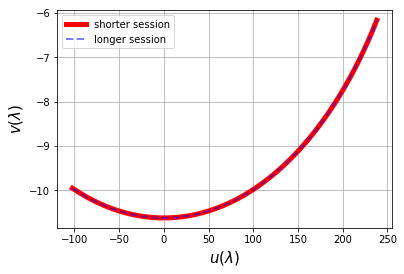

In [3]:
# This code plots the uv track for a baseline given the antenna coordinates, wavelength and the number of hours
dec             =2.082175*(np.pi/180.0) #in radians, declination for HD 35298

gmrt_lat        =19.1*(np.pi/180.0) # GMRT latitude
gmrt_long       =74.05*(np.pi/180.0)# GMRT longitude
start_alt       =20.0*(np.pi/180.0) # Starting elevation angle for GMRT
print ('This will show the uv tracks for a given baseline for two observing session of different lengths')
#num            =int(raw_input('Enter the number of hours: (integer expected) '))
num_arr         =np.array([float(i) for i in input('Enter the numbers of hours (e.g., 5 10):  ').split(' ')])

lamb            =float(input('Enter the wavelength in metre: '))
arr_typ         =int(input('Choose the array type: East-West (press 1), North-South (press 2) or inclined (press 3): '))
R               =6371.0*10**3   #Earth's radius in metres

def find_u_v(arr_typ,num,dec,gmrt_long,lamb):   # function to find u, v given an array of hour angles
        ant1_lat,ant1_long      =18.97239*(np.pi/180.0),74.05211*(np.pi/180.0)
        ant2_lat,ant2_long      =19.08447*(np.pi/180.0),74.04933*(np.pi/180.0)

        if arr_typ==1:
                ant2_lat=ant1_lat
        if arr_typ==2:
                ant2_long=ant1_long
        if arr_typ==3:
                ant2_lat=ant1_lat+abs(ant1_long-ant2_long)
        
        h_i     =np.arccos((np.sin(start_alt)-np.sin(dec)*np.sin(gmrt_lat))/(np.cos(dec)*np.cos(gmrt_lat))) #starting hour angle
        h_f     =h_i+num*15.0*(np.pi/180.0)
        h       =np.linspace(h_i,h_f,50)
        X1      =R*np.cos(ant1_lat)*np.cos(ant1_long-gmrt_long)
        X2      =R*np.cos(ant2_lat)*np.cos(ant2_long-gmrt_long)
        Y1      =R*np.cos(ant1_lat)*np.sin(ant1_long-gmrt_long)
        Y2      =R*np.cos(ant2_lat)*np.sin(ant2_long-gmrt_long)
        Z1      =R*np.sin(ant1_lat)
        Z2      =R*np.sin(ant2_lat)
        Lx      =X2-X1
        Ly      =Y2-Y1
        Lz      =Z2-Z1
        u       =(1.0/lamb)*(Lx*np.sin(h)+Ly*np.cos(h))
        v       =(1.0/lamb)*(-Lx*np.sin(dec)*np.cos(h)+Ly*np.sin(dec)*np.sin(h)+Lz*np.cos(dec))
        #print X1,Y1,Z1
        return u,v


lat1,long1      =18.97239*(np.pi/180.0),74.05211*(np.pi/180.0)
lat2,long2      =19.08447*(np.pi/180.0),74.04933*(np.pi/180.0)

u1,v1           =find_u_v(arr_typ,max(num_arr),dec,gmrt_long,lamb)
u2,v2           =find_u_v(arr_typ,min(num_arr),dec,gmrt_long,lamb)

plt.plot(u2,v2,'r-',linewidth=5,label='shorter session')
plt.plot(u1,v1,'b--',linewidth=2,alpha=0.5,label='longer session')


plt.xlabel(r'$u(\lambda)$',fontsize=15)
plt.ylabel(r'$v(\lambda)$',fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.show()


# Simulated source and tracks for GMRT antennas
In this exercise below, we have simulated a point source and a 2' Gaussian using GMRT antenna array.
Here left side is the image plane and right side is the UV plane. The constant amplitude is due to the point source at the center and the structure in the amplitude at small UV baselines is due to the extended source - the fundamental property of Fourier transforms!

![SegmentLocal](data/Images/source.png "segment")


In the images below, we should UV tracks for 1, 2, 5 and 10 hours, respectively and the resulting images. One note that while white source does not get affected, the extended source quality depends sensitivity on UV coverage. Why?


![SegmentLocal](data/Images/uvtracks.png "segment")
![SegmentLocal](data/Images/images.png "segment")


## Exercise for the UV tracks for the above simulated image
In the code below, the UV tracks are for the above simulated image using GMRT array. The observations are for 10 hours in total. You need to provide the fraction of the UV tracks. The number 1 implies the full UV tracks.
Compare UV tracks for fractions 0.1, 0.2, 0.5 and 1 and see how UV tracks improve with increased observations.


Give in percentage what fraction of the data to be plotted(e.g. for 10%, say 0.1):0.1


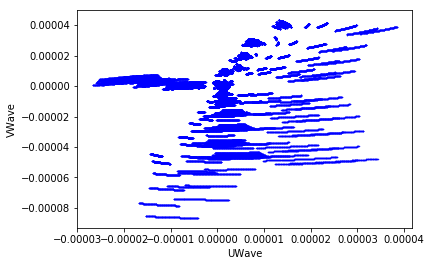

In [4]:
infilename      =       os.path.join(data_dir, 'uv.fits')

infile          =       fits.open(infilename)
data            =       infile[0].data

uarr            =       np.array(data.par('UU--'))
varr            =       np.array(data.par('VV--'))

fraction=float(input('Give in percentage what fraction of the data to be plotted(e.g. for 10%, say 0.1):'))
plotlen         =       int(len(uarr)*fraction)

plt.plot(uarr[:plotlen],varr[:plotlen],'b.',markersize=1)
plt.xlabel('UWave')
plt.ylabel('VWave')
plt.show()

infile.close()

## Virtual VRI software - A Virtual Radio Interferometer application
Below is the friendly virtual VRI software avaialble freely online at https://crpurcell.github.io/friendlyVRI/.

Run this software and follow instructions below.
https://crpurcell.github.io/friendlyVRI/HELP.html

Use at least three antenna arrays (GMRT, VLA and ALMA) and using 2 model images and create the radio image.
For the same observation, use different hour angles and note how image quality improves with the increased hour angle.

In [5]:
os.chdir(os.path.join('data', 'friendlyVRI-master'))
os.system('python vriTk.py')
os.chdir(cwd)

## Image Files
In the code below, you can fiddle around with the image files for 1 hr, 2 hr, 5 hr and 10 hr observations. They are pre-made FITs file. You can zoom-in, zoom-out, check source structure, check the peak flux, pixel positions etc.

Enter the fits file name (these are 1hr.fits, 2hrs.fits, 5hrs.fits, 10hrs.fits): 1hr.fits


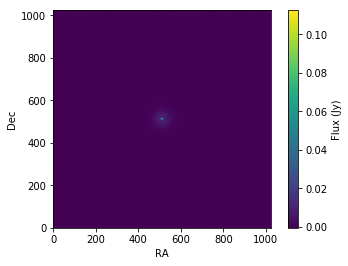

In [6]:
### This code shows the 2D image from a fits file
### Need to have astropy, WCSAxes packages installed
imname                  =input('Enter the fits file name (these are 1hr.fits, 2hrs.fits, 5hrs.fits, 10hrs.fits): ')
hdulist                 =fits.open(os.path.join(data_dir, imname))
hdu                     =hdulist[0]
data                    =hdu.data[0,0,:,:]
hdu.header['CDELT3']    =1.0
plt.subplot()
plt.imshow(hdu.data[0,0,:,:],vmax=max(hdu.data[0,0,:,:].flatten()),vmin=min(hdu.data[0,0,:,:].flatten()),origin='lower')
plt.xlabel('RA')
plt.ylabel('Dec')
cb=plt.colorbar()
cb.set_label('Flux (Jy)')
hdulist.close()


## Image Statistics
Give the pixels corresponding to the box in which you want to find out the flux and obtain the flux. The flux will be estimated for the last running file. Run the code below and give the pixel range obtained from the other image. 
Find the flux density for the noise in the upper right region, region covering the
bright source, and region covering the extended source. 

In [7]:
bottom_x, bottom_y = map(int, input('bottom left corner of your region (in format, e.g. 502, 506): ').split(','))
upper_x, upper_y = map(int, input('upper right corner of your region (in format, e.g. 520, 518): ').split(','))

print (bottom_x,bottom_y)
print (upper_x,upper_y)

num_pix_in_beam=19 ###beam_area/pixel_size**2
print (data[bottom_x:upper_x+1,bottom_y:upper_y+1])
flux_density=np.sum(data[bottom_x:upper_x+1,bottom_y:upper_y+1])/num_pix_in_beam
print (flux_density*1e3, "mJy")

bottom left corner of your region (in format, e.g. 502, 506): 502, 506
upper right corner of your region (in format, e.g. 520, 518): 520, 518
502 506
520 518
[[0.01005777 0.01000005 0.01001082 0.01007294 0.01015488 0.01022022
  0.01023758 0.01018868 0.01007239 0.00990365 0.00970807 0.00951426
  0.00934673]
 [0.01023271 0.01019404 0.01020637 0.01026021 0.01033302 0.01039596
  0.0104222  0.01039421 0.01030773 0.01017102 0.01000033 0.00981409
  0.00962825]
 [0.01065369 0.01070555 0.01073378 0.01073424 0.01070292 0.01063723
  0.01053757 0.01040852 0.01025844 0.0100973  0.00993328 0.00977031
  0.00960789]
 [0.01106416 0.01119297 0.01125261 0.01123405 0.0111398  0.01098323
  0.01078549 0.01057081 0.01036125 0.01017184 0.0100074  0.00986225
  0.00972322]
 [0.01130496 0.0114346  0.01152207 0.01155037 0.0115135  0.01141792
  0.01127947 0.01111779 0.01095018 0.01078678 0.01062831 0.01046681
  0.01028912]
 [0.01196422 0.01219954 0.01243916 0.01264996 0.01280291 0.01287939
  0.01287272 0.01278592 